# COVID-19 Dashboard

## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import make_interp_spline

## Load Data

In [2]:
import pandas as pd
import io
import requests
url="https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
df.sort_values(['countryterritoryCode','year','month','day']).reset_index(drop=True)
df = df[['dateRep','day','month','year','cases','deaths','countriesAndTerritories',
        'geoId','countryterritoryCode']]
df['dateRep'] = pd.to_datetime(df['dateRep'], format = '%d/%m/%Y').dt.date

#### Colors

In [4]:
import plotly.express as px

print(px.colors.qualitative.Plotly)

['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']


In [ ]:
['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52',
'#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52',
'#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52',
'#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52',
'#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52',
'#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52',
'#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52',
'#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52',
'#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52',
 '#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52',
 '#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52',
 '#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52',
 '#636EFA', '#EF553B'];

#### Cases

In [6]:
df_pivot_c= df.pivot(index='dateRep', columns='countriesAndTerritories', values='cases')
df_pivot_c_cumsum = df_pivot_c.cumsum()

In [7]:
df_norm_100case = []
for column in df_pivot_c_cumsum.columns:
    df_norm_100case.append(df_pivot_c_cumsum[column][df_pivot_c_cumsum[column] >= 100].values)

df_norm_100case = pd.DataFrame(df_norm_100case).T

df_norm_100case.columns = df_pivot_c_cumsum.columns

df_norm_100case = df_norm_100case.dropna(how='all',axis = 1)

In [8]:
y_cutoff = 6000000
x_start = 100
Double_1day = [x_start]
Double_2days = [x_start]
Double_3days = [x_start]
Double_4days = [x_start]
Double_week = [x_start]
for i in range(1,77):
    x = x_start * (2 ** i)
    if x > y_cutoff:
        x = y_cutoff
        Double_1day.append(x)
    else: Double_1day.append(x)
    y = x_start * ((2 ** (1/2)) ** i)
    if y > y_cutoff:
        y = y_cutoff
        Double_2days.append(y)
    else: Double_2days.append(y)
    z = x_start * ((2**(1/3)) ** i)
    if z > y_cutoff:
        z = y_cutoff
        Double_3days.append(z)
    else: Double_3days.append(z)
    v = x_start * ((2**(1/4)) ** i)
    if v > y_cutoff:
        v = y_cutoff
        Double_4days.append(v)
    else: Double_4days.append(v)
    w = x_start * ((2**(1/7)) ** i)
    if w > y_cutoff:
        w = y_cutoff
        Double_week.append(w)
    else: Double_week.append(w)

Lines_c = pd.DataFrame(Double_1day,columns=['Double_1day'],dtype=np.float64)
Lines_c['Double_2days'] = pd.DataFrame(Double_2days)
Lines_c['Double_3days'] = pd.DataFrame(Double_3days)
Lines_c['Double_4days'] = pd.DataFrame(Double_4days)
Lines_c['Double_week'] = pd.DataFrame(Double_week)

Text(0, 0.5, 'Comulative number of cases')

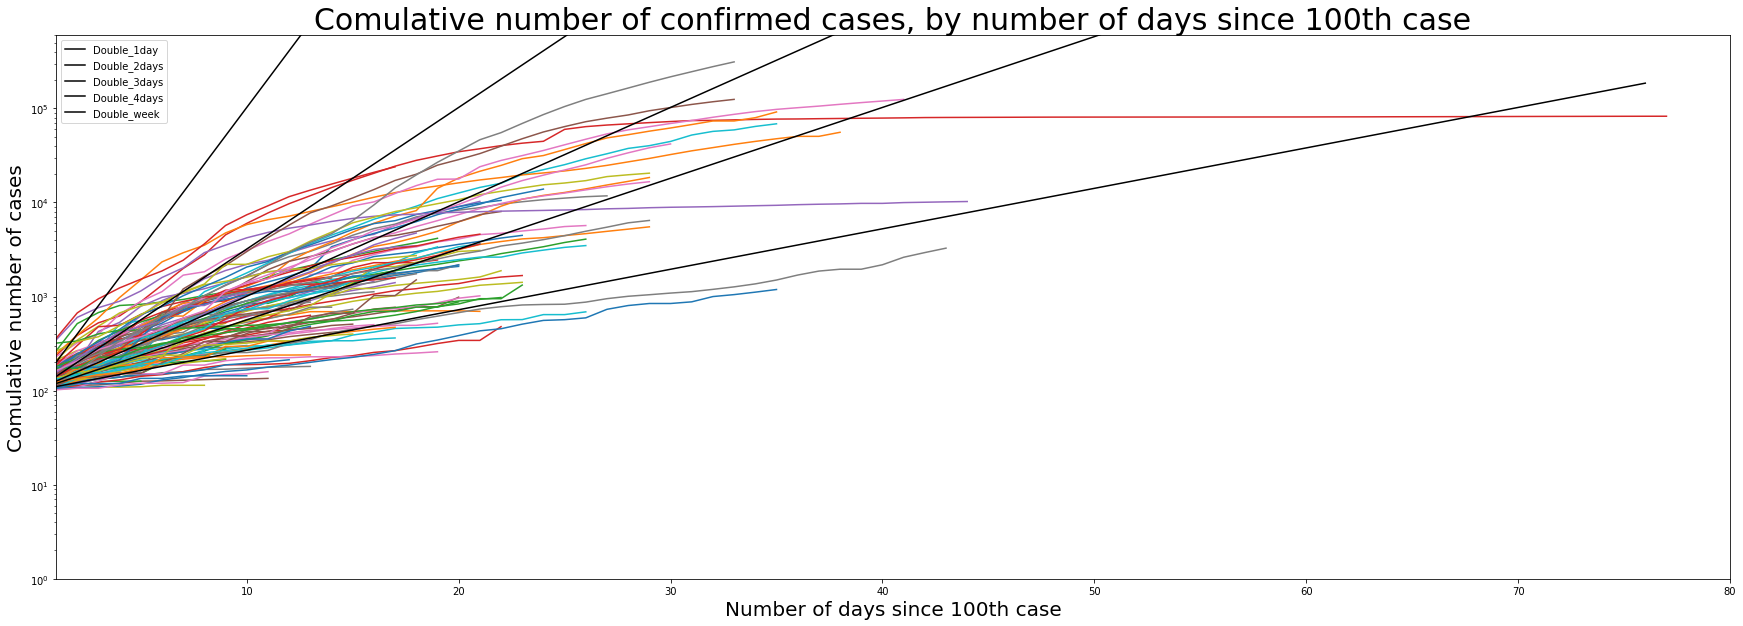

In [9]:
fig, ax = plt.subplots(figsize=(30,10))
df_norm_100case.plot(ax=ax,legend=False)
Lines_c.plot(ax = ax,color='k')
plt.yscale('log')
plt.ylim(1,600000)
plt.xlim(1,80)
plt.title('Comulative number of confirmed cases, by number of days since 100th case', fontsize=30)
plt.xlabel('Number of days since 100th case', fontsize=20)
plt.ylabel('Comulative number of cases', fontsize=20)

#### Deaths

In [10]:
df_pivot_d = df.pivot(index='dateRep', columns='countriesAndTerritories', values='deaths')
df_pivot_d_cumsum = df_pivot_d.cumsum()

In [11]:
df_norm_10death = []
for column in df_pivot_d_cumsum.columns:
    df_norm_10death.append(df_pivot_d_cumsum[column][df_pivot_d_cumsum[column] >= 10].values)

df_norm_10death = pd.DataFrame(df_norm_10death).T

df_norm_10death.columns = df_pivot_d_cumsum.columns

df_norm_10death = df_norm_10death.dropna(how='all',axis = 1)


In [12]:
y_cutoff = 21000
x_start = 10
Double_1day = [x_start]
Double_2days = [x_start]
Double_3days = [x_start]
Double_week = [x_start]
for i in range(1,77):
    x = x_start * (2 ** i)
    if x > y_cutoff:
        x = y_cutoff
        Double_1day.append(x)
    else: Double_1day.append(x)
    y = x_start * ((2 ** (1/2)) ** i)
    if y > y_cutoff:
        y = y_cutoff
        Double_2days.append(y)
    else: Double_2days.append(y)
    z = x_start * ((2**(1/3)) ** i)
    if z > y_cutoff:
        z = y_cutoff
        Double_3days.append(z)
    else: Double_3days.append(z)
    w = x_start * ((2**(1/7)) ** i)
    if w > y_cutoff:
        w = y_cutoff
        Double_week.append(w)
    else: Double_week.append(w)

Lines_d = pd.DataFrame(Double_1day,columns=['Double_1day'],dtype=np.float64)
Lines_d['Double_2days'] = pd.DataFrame(Double_2days)
Lines_d['Double_3days'] = pd.DataFrame(Double_3days)
Lines_d['Double_week'] = pd.DataFrame(Double_week)

Text(0, 0.5, 'Comulative number of deaths')

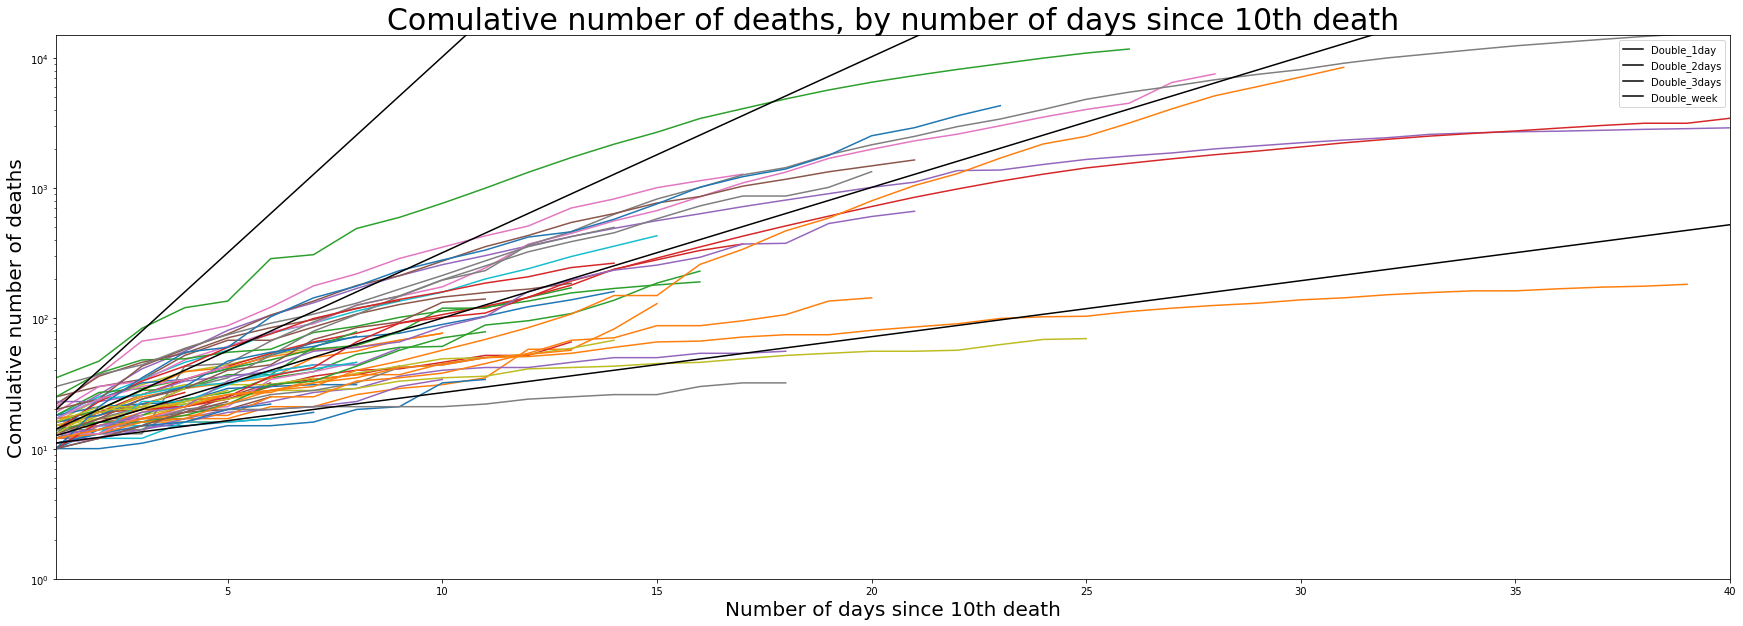

In [13]:
fig, ax = plt.subplots(figsize=(30,10))
df_norm_10death.plot(ax=ax,legend=False)
Lines_d.plot(ax = ax,color='k')
plt.yscale('log')
plt.ylim(1,15000)
plt.xlim(1,40)
plt.title('Comulative number of deaths, by number of days since 10th death', fontsize=30)
plt.xlabel('Number of days since 10th death', fontsize=20)
plt.ylabel('Comulative number of deaths', fontsize=20)

In [14]:
df_pivot_weekly = df_pivot_d.groupby(df_pivot_d.reset_index(drop=True).index // 7).sum()
df_pivot_weekly = df_pivot_weekly.loc[:, (df_pivot_weekly != 0).any(axis=0)]

countries = df_pivot_weekly.agg(max) > 20
countries = (countries[countries == True].index.values)
df_pivot_weekly = df_pivot_weekly[countries]

df_norm_20death = []
for column in df_pivot_weekly.columns:
    df_norm_20death.append(df_pivot_d[column].iloc[df_pivot_weekly[column]\
                                    [df_pivot_weekly[column] >= 20].index[0] * 7:].values)

df_norm_20death = pd.DataFrame(df_norm_20death).T
df_norm_20death.columns = df_pivot_weekly.columns
df_norm_20death = df_norm_20death.dropna(how='all',axis = 1)
df_norm_20death = df_norm_20death.rolling(7).mean().iloc[7:].reset_index(drop=True)

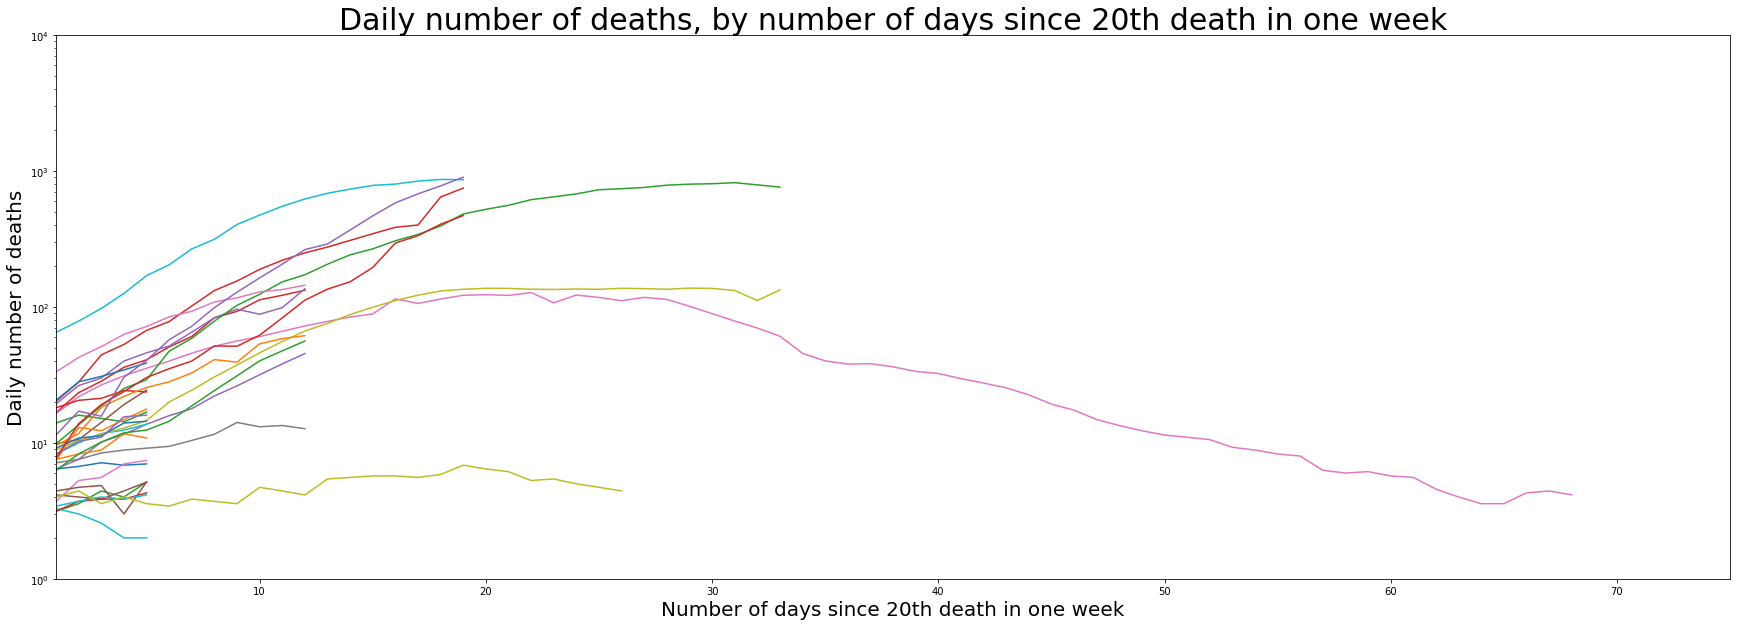

In [15]:
fig, ax = plt.subplots(figsize=(30,10))
df_norm_20death.plot(ax=ax,legend=False)
plt.yscale('log')
plt.ylim(1,10000)
plt.xlim(1,75)
plt.title('Daily number of deaths, by number of days since 20th death in one week', fontsize=30)
plt.xlabel('Number of days since 20th death in one week', fontsize=20)
plt.ylabel('Daily number of deaths', fontsize=20);

In [45]:
countries = df_pivot_d.agg(max) > 3
countries = (countries[countries == True].index.values)
df_pivot_3death = df_pivot_d[countries]

In [17]:
df_norm_3death = []
for column in df_pivot_3death.columns:
    temp = df_pivot_3death[column].reset_index(drop=True)
    df_norm_3death.append(df_pivot_3death[column].iloc[temp[temp > 3].index[0]:].values)

df_norm_3death = pd.DataFrame(df_norm_3death).T
df_norm_3death.columns = df_pivot_3death.columns
df_norm_3death = df_norm_3death.rolling(7).mean().iloc[6:].reset_index(drop=True)
df_norm_3death = df_norm_3death.dropna(how='all',axis = 1)
df_norm_3death = df_norm_3death.drop(['Algeria','Iraq','Philippines','San_Marino','Slovenia'],axis=1)

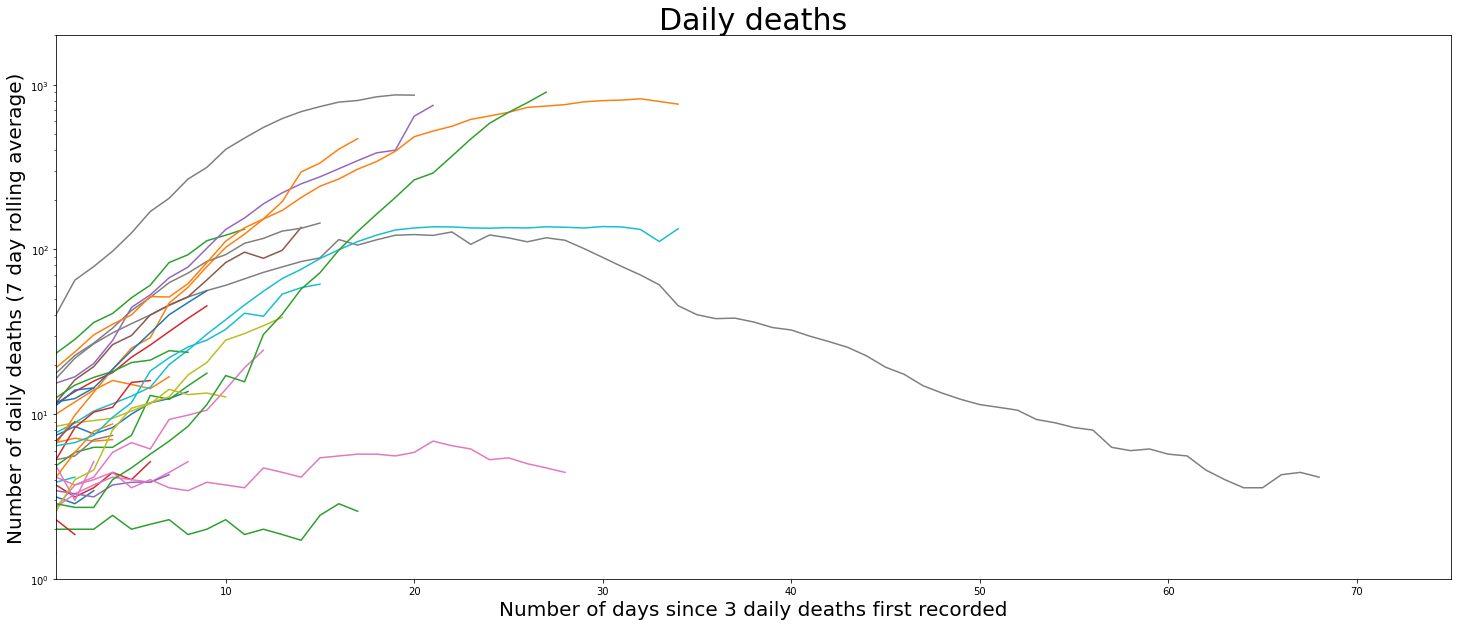

In [18]:
fig, ax = plt.subplots(figsize=(25,10))
df_norm_3death.plot(ax=ax,legend=False)
plt.yscale('log')
plt.ylim(1,2000)
plt.xlim(1,75)
plt.title('Daily deaths', fontsize=30)
plt.xlabel('Number of days since 3 daily deaths first recorded', fontsize=20)
plt.ylabel('Number of daily deaths (7 day rolling average)', fontsize=20);

In [19]:
# Country Colors
Country_Colors = pd.DataFrame(df_norm_100case.columns.values,columns=['Country']).reset_index()
Country_Colors.columns = ['Color','Country']
Country_Colors['Color'] = Country_Colors['Color'] + 1

In [20]:
column= 'China'
Country_Colors[Country_Colors.Country == column].iloc[0,0]

24

## Geo Plot

In [245]:
df_geo = df[df.year != 2019].drop(['day','year','month','geoId'],axis=1)
df_geo = df_geo[df_geo.countriesAndTerritories != 'Cases_on_an_international_conveyance_Japan'].reset_index(drop=True)
df_geo.columns = ['day','cases','deaths','country','iso_alpha']
df_geo['continent'] = 0
df_geo['day'] = pd.to_datetime(df_geo['day'], format = '%Y/%m/%d').dt.dayofyear
df_geo = df_geo.sort_values(['day','country']).reset_index(drop = True)
df_geo['cases'] = df_geo[['country', 'day','cases']].groupby(['country', 'day']).sum()\
                                                    .groupby(level=0).cumsum().reset_index()\
                                                    .sort_values(['day','country'])\
                                                    .reset_index(drop = True).cases
df_geo['deaths'] = df_geo[['country', 'day','deaths']].groupby(['country', 'day']).sum()\
                                                    .groupby(level=0).cumsum().reset_index()\
                                                    .sort_values(['day','country'])\
                                                    .reset_index(drop = True).deaths

In [246]:
Africa = ['Algeria','Mauritania', 'Burundi','Malawi', 'Guinea', 'Guinea_Bissau', 'Gambia', 'Djibouti',  'Gabon', 'Benin', 'Burkina_Faso', 'Liberia', 'Libya','Cameroon', 'Canada', 'Cote_dIvoire','Uganda', 'Namibia',
          'Central_African_Republic', 'Chad', 'Congo','Togo', 'Somalia','Sudan', 'Sierra_Leone', 
          'Democratic_Republic_of_the_Congo', 'Egypt', 'Ghana', 'Kenya','Botswana','Mali',
          'Mauritius', 'Morocco', 'Nigeria', 'Senegal', 'South_Africa', 'Zambia', 'Zimbabwe',
          'Tunisia','Angola','United_Republic_of_Tanzania','Rwanda','Cape_Verde','Equatorial_Guinea',
          'Eritrea', 'Eswatini', 'Ethiopia','Madagascar','Mozambique','Niger','Seychelles']

Americas = ['Argentina','Montserrat', 'Maldives',  'Guyana', 'Haiti','British_Virgin_Islands',  'Bonaire, Saint Eustatius and Saba', 'Nicaragua','Bolivia', 'Sint_Maarten','Saint_Lucia', 'Saint_Vincent_and_the_Grenadines',
            'Brazil', 'Canada', 'Chile','Barbados', 'Belize','Bermuda','Paraguay','Greenland',
            'Colombia', 'Costa_Rica', 'Cuba', 'Dominican_Republic','Turks_and_Caicos_islands',
            'Ecuador', 'Honduras', 'Mexico', 'Panama', 'Peru','Suriname', 'United_States_Virgin_Islands',
            'Puerto_Rico', 'Trinidad_and_Tobago', 'United_States_of_America','Jamaica','Saint_Barthelemy', 'Saint_Kitts_and_Nevis',
            'Uruguay',  'Venezuela','Anguilla', 'Antigua_and_Barbuda', 'Aruba', 'Bahamas',
           'Guatemala','Grenada',  'Cayman_Islands','Curaçao', 'Dominica', 'El_Salvador','Falkland_Islands_(Malvinas)']

Asia = ['Afghanistan', 'Algeria', 'Armenia', 'Azerbaijan', 'Bahrain','Timor_Leste', 'Guam',
        'Brunei_Darussalam', 'Cambodia','Bangladesh','Bhutan','Syria', 'Nepal','Laos',
        'Cases_on_an_international_conveyance_Japan', 'China', 'India','Mongolia','Myanmar',
        'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan',
        'Kuwait', 'Kyrgyzstan',  'Lebanon', 'Malaysia', 'Oman', 'Pakistan',
        'Palestine', 'Philippines',  'Qatar', 'Russia','Saudi_Arabia',
        'Singapore', 'South_Korea', 'Sri_Lanka', 'Taiwan', 'Thailand','Fiji', 'French_Polynesia',
        'Tunisia', 'Turkey', 'United_Arab_Emirates','Uzbekistan', 'Vietnam']

Europe = ['Albania', 'Holy_See', 'Andorra', 'Austria', 'Belarus', 'Belgium','Monaco',
          'Bosnia_and_Herzegovina', 'Bulgaria',  'Croatia', 'Cyprus',
          'Czech_Republic', 'Denmark', 'Estonia', 'Finland', 'France','Liechtenstein',
          'Faroe_Islands','Germany', 'Greece', 'Guernsey', 'Hungary',
          'Iceland', 'Ireland', 'Isle_of_Man', 'Italy', 'Jersey', 'Kosovo',
          'Latvia', 'Lithuania', 'Luxembourg',  'Malta', 'Moldova',
          'Montenegro',  'Netherlands', 'North_Macedonia', 'Norway', 'Poland',
          'Portugal',  'Romania', 'Russia','San_Marino', 'Serbia', 'Slovakia',
          'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
          'United_Kingdom','Georgia', 'Gibraltar']

Oceania = ['Australia','New_Zealand','New_Caledonia','Northern_Mariana_Islands','Papua_New_Guinea']

In [247]:
for i, country in enumerate(df_geo.country):
    if country in Africa:
        df_geo['continent'].iloc[i] = 'Africa'
    elif country in Americas:
        df_geo['continent'].iloc[i] = 'Americas'
    elif country in Asia:
        df_geo['continent'].iloc[i] = 'Asia'
    elif country in Europe:
        df_geo['continent'].iloc[i] = 'Europe'
    elif country in Oceania:
        df_geo['continent'].iloc[i] = 'Oceania'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [250]:
import plotly.express as px
fig = px.scatter_geo(df_geo, locations="iso_alpha", color="continent",
                     hover_name="country", size="cases",
                     animation_frame="day",
                     projection="natural earth")
fig.show()